<a href="https://colab.research.google.com/github/SakshiTalreja/Machine-Learning/blob/main/ML_Algo_identifier_for_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd   
import numpy as np    
from sklearn.model_selection import train_test_split  
import matplotlib.pyplot as plt

In [ ]:
fileinput = input("Enter csv file name: ")
if not '.csv' in fileinput:
  fileinput += '.csv' 

Enter csv file name: WIPRO.NS


In [ ]:
df = pd.read_csv(fileinput, na_values=['##', '??']) 

In [ ]:
# replacing date column to Sno
if df.columns.any() == 'Date' and df.columns.any() !='Sno':
  df.insert(0, 'Sno', np.arange(len(df)))
  dates = df['Date']
  del df['Date']

In [ ]:
#filling missing values in data
if df.isnull().values.any():
  nan_col = df.columns[df.isnull().values.any()]
  op = int(input("Do you want to fill nan values with...\n1. Mean\n2. Median\nEnter 1 or 2: "))
  if op==1:
    for i in range(len(nan_col[0])):
      df[nan_col[0][i]].fillna(df[nan_col[0][i]].mean(), inplace=True)
    print("Nan values are filled with Mean..")
  elif op==2:
    for i in range(len(nan_col)):
      df[nan_col[0][i]].fillna(df[nan_col[0][i]].median(), inplace=True)
    print("Nan values are filled with Median..")
# print(df.isnull().sum())
# print(df.dtypes)

In [ ]:
# checking classification datatype string in each column
for i in range(len(df.columns)):
  if df.iloc[:, i].dtype == np.object:
    unique = np.unique(df.iloc[:, i])
    df.replace(unique, np.arange(len(unique)), inplace=True)

In [ ]:
# defining x and y
user_y = input("Enter y which you want to predict: ")
y = df.loc[:, user_y]
x = df.drop([user_y, 'Volume'], axis=1)

Enter y which you want to predict: RSI


In [ ]:
# splitting data into training and test55ing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

Algorithms

In [ ]:
train_accuracy = []
test_accuracy = []
train_rsme = []
test_rsme = []
kfolds = []
kfold_accuracy = []

In [ ]:
from sklearn.metrics import r2_score 
def accuracy_score(y_train, y_pred_train, y_test, y_pred_test):
  print("Accuracy in Training: ", r2_score(y_train, y_pred_train)*100)
  train_accuracy.append(r2_score(y_train, y_pred_train)*100)
  print("Accuracy in Testing: ", r2_score(y_test, y_pred_test)*100)
  test_accuracy.append(r2_score(y_test, y_pred_test)*100)

In [ ]:
from sklearn.metrics import mean_squared_error 
def rsme(y_train, y_pred_train, y_test, y_pred_test):
  rsme_test = mean_squared_error(y_test, y_pred_test, squared=False)
  rsme_train = mean_squared_error(y_train, y_pred_train, squared=False)
  train_rsme.append(rsme_train)
  test_rsme.append(rsme_test)
  print("RSME Train: ", rsme_train)
  print("RSME Test: ", rsme_test)

In [ ]:
from sklearn.model_selection import KFold 
def k_fold(algo, kx, ky, cv):
  kf = KFold(n_splits=cv, random_state=None) 
  kfolds.append(cv)
  scores = []
  model = algo
  for train_index, test_index in kf.split(kx):
    X_train, X_test, Y_train, Y_test = kx.iloc[train_index], kx.iloc[test_index], ky[train_index], ky[test_index]
    model.fit(X_train, np.ravel(Y_train))
    Y_pred_train = model.predict(X_train) 
    scores.append(r2_score(Y_train, Y_pred_train))
  print("KFold Accuracy: {}".format(np.mean(scores)*100)) 
  kfold_accuracy.append(np.mean(scores)*100)

Linear Regression

Accuracy in Training:  57.423149179364216
Accuracy in Testing:  63.82862686703756
RSME Train:  9.895554871059664
RSME Test:  8.732100368532397
Number of KFolds do you want: 5
KFold Accuracy: 65.3604896285049


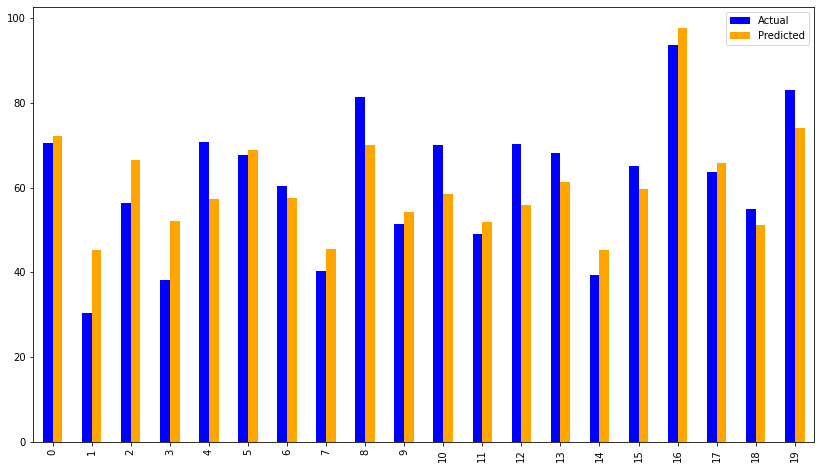

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_train_lr = lr_model.predict(x_train)
y_pred_test_lr = lr_model.predict(x_test)
accuracy_score(y_train, y_pred_train_lr, y_test, y_pred_test_lr)
rsme(y_train, y_pred_train_lr, y_test, y_pred_test_lr)
no_kfold = int(input("Number of KFolds do you want: "))
k_fold(LinearRegression(), x, y, no_kfold)
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test_lr})
df_compare.set_index(np.arange(len(df_compare)), inplace=True) 
df_compare.head(20).plot(kind='bar',figsize=(14,8), color=['b', 'orange'])
# df_compare[['Actual', 'Predicted']].plot(subplots=False, figsize=(12,5), legend=True)

[48.12857345960939, 64.37825784708183, 60.25639238657637, 71.32956729482287, 70.78180158345313, 71.36620332391455, 70.28681220476147, 62.69625829092816, 62.25746502205604, 63.69537562535614, 63.84100754546493, 63.036963632713764, 63.65342168626527, 64.15924709688228, 63.82862686703756, 63.82862686703756, 63.82862686703756, 63.82862686703756, 63.82862686703756, 63.82862686703756, 63.82862686703756, 63.82862686703756, 63.82862686703756, 63.82862686703756, 63.82862686703756, 63.82862686703756, 63.82862686703756, 63.82862686703756, 63.82862686703756, 63.82862686703756, 63.82862686703756, 63.82862686703756]
[51.87142654039061, 35.62174215291817, 39.74360761342363, 28.670432705177134, 29.21819841654687, 28.633796676085453, 29.713187795238525, 37.30374170907184, 37.74253497794396, 36.30462437464386, 36.15899245453507, 36.963036367286236, 36.34657831373473, 35.84075290311772, 36.17137313296244, 36.17137313296244, 36.17137313296244, 36.17137313296244, 36.17137313296244, 36.17137313296244, 36.17

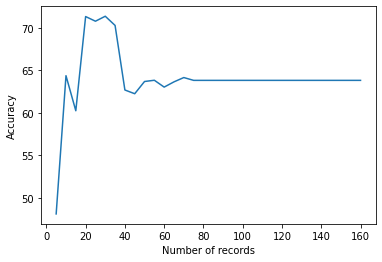

In [ ]:
i=5
accuracy = []
error = []
data = []
y_train.reset_index(drop=True, inplace=True)
while i<len(y_train):
  accuracy.append(r2_score(y_test[0:i], y_pred_test_lr[0:i])*100)
  error.append(100-(r2_score(y_test[0:i], y_pred_test_lr[0:i])*100))
  data.append(i) 
  i=i+5 
print(accuracy) 
print(error) 
plt.plot(data, accuracy) 
plt.ylabel("Accuracy") 
plt.xlabel("Number of records")
print(np.average(accuracy))
print(y_train[0:10]) 
print(y_pred_train_lr[0:10])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd779eb5490>,
      dtype=object)

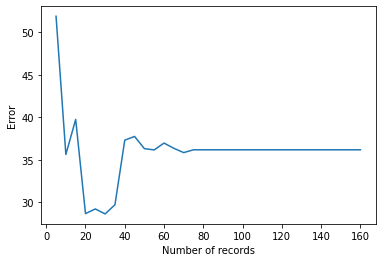

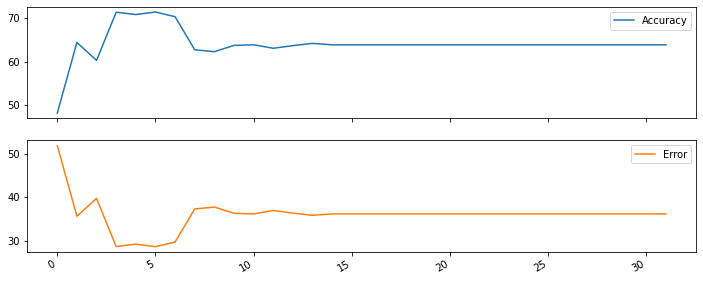

In [ ]:
plt.plot(data, error)
plt.ylabel("Error") 
plt.xlabel("Number of records")
data_co = pd.DataFrame({'Accuracy': accuracy, 'Error': error})
data_co[['Accuracy', 'Error']].plot(subplots=True, figsize=(12,5), legend=True)

KNN

Accuracy in Training:  69.81505087690525
Accuracy in Testing:  61.54312465701148
RSME Train:  8.33198745663239
RSME Test:  9.003745657689434
Number of KFolds do you want: 5
KFold Accuracy: 83.04736537143495


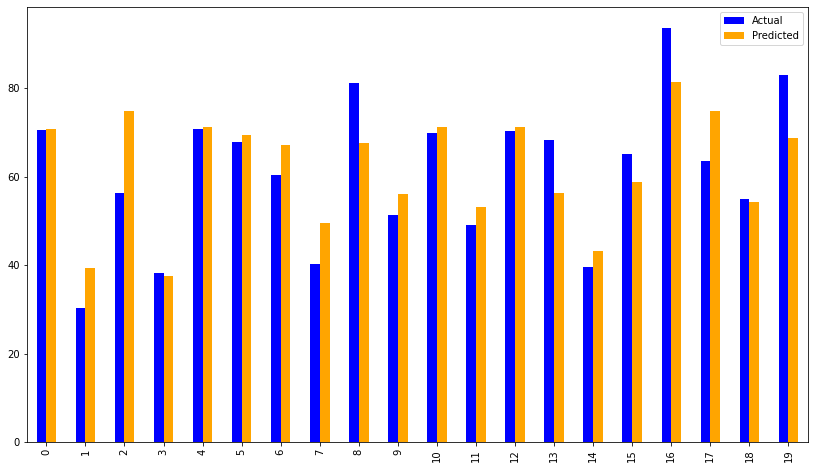

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
knn_model = KNeighborsRegressor(n_neighbors=7)
knn_model.fit(x_train, y_train)
y_pred_train_knn = knn_model.predict(x_train)
y_pred_test_knn = knn_model.predict(x_test)
accuracy_score(y_train, y_pred_train_knn, y_test, y_pred_test_knn)
rsme(y_train, y_pred_train_knn, y_test, y_pred_test_knn)
no_kfold = int(input("Number of KFolds do you want: "))
k_fold(KNeighborsRegressor(), x, y, no_kfold) 
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test_knn})
df_compare.set_index(np.arange(len(df_compare)), inplace=True) 
df_compare.head(20).plot(kind='bar',figsize=(14,8), color=['b', 'orange'])

[68.89173580893349, 68.89501300746815, 71.5540814995326, 71.26849062223266, 72.82290498909467, 70.86366816606615, 71.41080550609873, 70.80476047744662, 70.8852147041378, 71.10695216980893, 69.47699912041698, 67.95083985978323, 66.51051651161501, 66.82829508713948, 61.54312465701148, 61.54312465701148, 61.54312465701148, 61.54312465701148, 61.54312465701148, 61.54312465701148, 61.54312465701148, 61.54312465701148, 61.54312465701148, 61.54312465701148, 61.54312465701148, 61.54312465701148, 61.54312465701148, 61.54312465701148, 61.54312465701148, 61.54312465701148, 61.54312465701148, 61.54312465701148, 61.54312465701148, 61.54312465701148, 61.54312465701148, 61.54312465701148, 61.54312465701148, 61.54312465701148, 61.54312465701148, 61.54312465701148, 61.54312465701148, 61.54312465701148, 61.54312465701148, 61.54312465701148, 61.54312465701148, 61.54312465701148]
[31.10826419106651, 31.10498699253185, 28.4459185004674, 28.73150937776734, 27.177095010905333, 29.136331833933852, 28.58919449

Text(0.5, 0, 'Number of records')

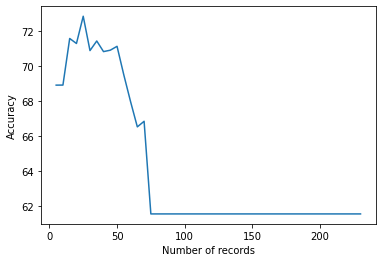

In [ ]:
i=5
accuracy = []
error = []
data = []
while i<len(df):
  accuracy.append(r2_score(y_test[0:i], y_pred_test_knn[0:i])*100)
  error.append(100-(r2_score(y_test[0:i], y_pred_test_knn[0:i])*100))
  data.append(i)
  i=i+5
print(accuracy)
print(error)
plt.plot(data, accuracy)
plt.ylabel("Accuracy") 
plt.xlabel("Number of records")

Text(0.5, 0, 'Number of records')

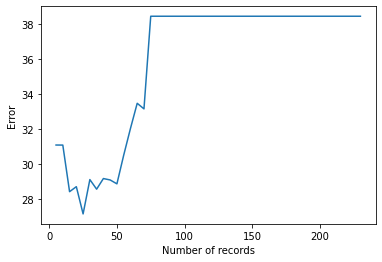

In [ ]:
plt.plot(data, error)
plt.ylabel("Error") 
plt.xlabel("Number of records")

Random Forest

Accuracy in Training:  99.9802052893958
Accuracy in Testing:  99.83055708925559
RSME Train:  0.21336734922706774
RSME Test:  0.5976513746003518
Number of KFolds do you want: 5
KFold Accuracy: 99.97119389049928
       Actual  Predicted  Abs error
0   70.584762  70.569803   0.014958
1   30.407538  31.571933   1.164395
2   56.405302  56.696038   0.290736
3   38.160725  37.488880   0.671845
4   70.827908  70.785428   0.042480
5   67.772198  67.978092   0.205894
6   60.355917  60.248220   0.107697
7   40.238217  38.224001   2.014216
8   81.288357  81.344338   0.055981
9   51.445434  51.253549   0.191884
10  69.986589  69.999109   0.012520
11  49.092010  48.566656   0.525354
12  70.374060  70.283713   0.090347
13  68.275148  68.307761   0.032613
14  39.501783  38.439858   1.061925
15  65.085850  64.801862   0.283988
16  93.647912  91.067627   2.580285
17  63.607315  63.598180   0.009135
18  55.023100  54.650503   0.372596
19  82.964817  84.571430   1.606613
Mean absolute Error:  0.3461944662

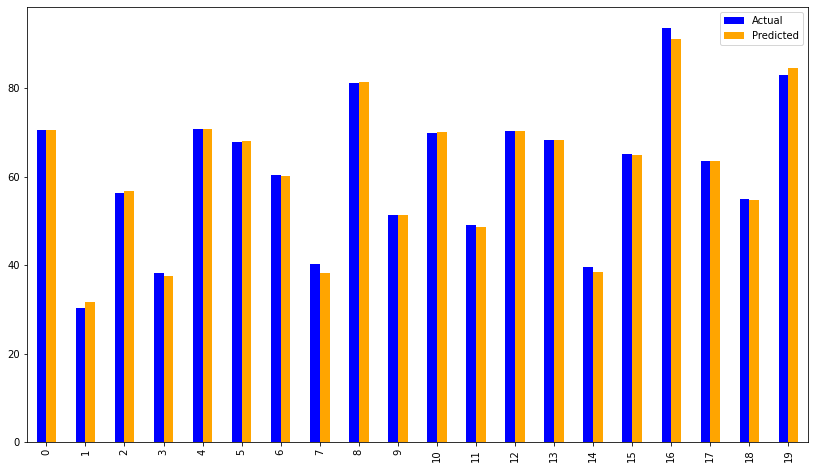

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae
rf_model = RandomForestRegressor(n_estimators=100, random_state=0, max_depth=10)
rf_model.fit(x_train, y_train)
y_pred_train_rf = rf_model.predict(x_train)
y_pred_test_rf = rf_model.predict(x_test)
accuracy_score(y_train, y_pred_train_rf, y_test, y_pred_test_rf)
rsme(y_train, y_pred_train_rf, y_test, y_pred_test_rf) 
no_kfold = int(input("Number of KFolds do you want: "))
k_fold(RandomForestRegressor(), x, y.astype('int'), no_kfold)
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test_rf, 'Abs error': abs(y_test- y_pred_test_rf)})
df_compare.set_index(np.arange(len(df_compare)), inplace=True) 
df_compare[['Actual', 'Predicted']].head(20).plot(kind='bar',figsize=(14,8), color=['b', 'orange'])
print(df_compare.head(20))

from sklearn.metrics import mean_absolute_error as mae
print("Mean absolute Error: ", mae(y_test, y_pred_test_rf))
# from sklearn import tree
# plt.figure(figsize=(10,10))
# _ = tree.plot_tree(rf_model.estimators_[0], feature_names=df_compare, filled=True)

[99.86165857234386, 99.75493497724538, 99.77429959089551, 99.66694307535037, 99.66934795880385, 99.7065190252439, 99.72280877259261, 99.77548092496507, 99.79507433811754, 99.80706611287047, 99.8142796043816, 99.82899768938016, 99.832417206162, 99.82706877843506, 99.83055708925559, 99.83055708925559, 99.83055708925559, 99.83055708925559, 99.83055708925559, 99.83055708925559, 99.83055708925559, 99.83055708925559, 99.83055708925559, 99.83055708925559, 99.83055708925559, 99.83055708925559, 99.83055708925559, 99.83055708925559, 99.83055708925559, 99.83055708925559, 99.83055708925559, 99.83055708925559, 99.83055708925559, 99.83055708925559, 99.83055708925559, 99.83055708925559, 99.83055708925559, 99.83055708925559, 99.83055708925559, 99.83055708925559, 99.83055708925559, 99.83055708925559, 99.83055708925559, 99.83055708925559, 99.83055708925559, 99.83055708925559]
[0.13834142765614388, 0.24506502275461628, 0.22570040910449052, 0.33305692464962533, 0.3306520411961458, 0.29348097475609336, 0.2

Text(0.5, 0, 'Number of records')

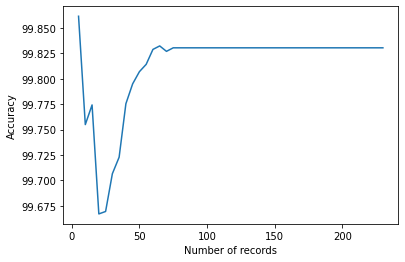

In [ ]:
i=5
accuracy = []
error = []
data = []
while i<len(df):
  accuracy.append(r2_score(y_test[0:i], y_pred_test_rf[0:i])*100)
  error.append(100-(r2_score(y_test[0:i], y_pred_test_rf[0:i])*100))
  data.append(i)
  i=i+5
print(accuracy)
print(error)
plt.plot(data, accuracy)
plt.ylabel("Accuracy") 
plt.xlabel("Number of records")

Text(0.5, 0, 'Number of records')

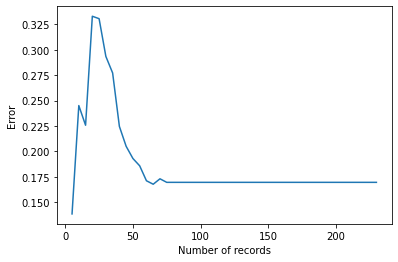

In [ ]:
plt.plot(data, error)
plt.ylabel("Error") 
plt.xlabel("Number of records")

SVR

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler().fit_transform(x)
y = np.array(y).reshape(-1, 1)
sc_y = StandardScaler().fit_transform(y) 
x_train_sc, x_test_sc, y_train_sc, y_test_sc = train_test_split(sc_x, sc_y, test_size = 0.3, random_state = 0)

Accuracy in Training:  85.86523196807617
Accuracy in Testing:  87.13750701999572
RSME Train:  0.38053427123865213
RSME Test:  0.34753203713217484
K Fold Accuracy: 89.0474157453269


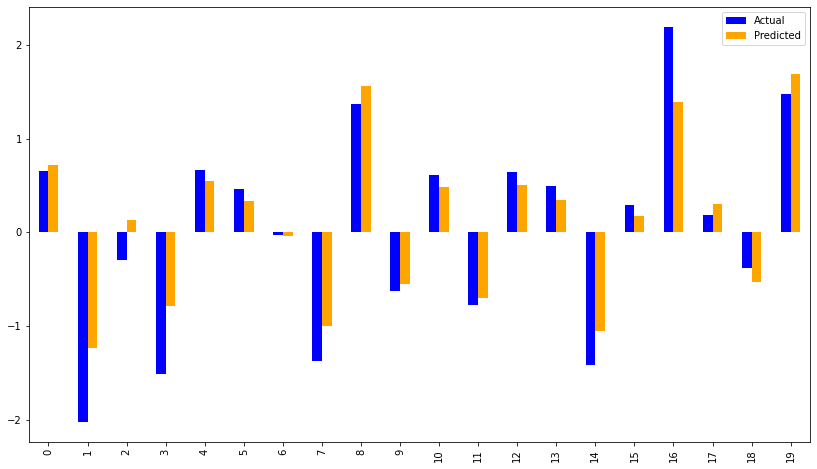

In [ ]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(x_train_sc, y_train_sc[:,0])
y_pred_train_svr = svr_model.predict(x_train_sc)
y_pred_test_svr = svr_model.predict(x_test_sc) 
accuracy_score(y_train_sc, y_pred_train_svr, y_test_sc, y_pred_test_svr)
rsme(y_train_sc, y_pred_train_svr, y_test_sc, y_pred_test_svr)

kf = KFold(n_splits=5, random_state=None) 
kfolds.append(5)
scores = []
model = SVR(kernel='rbf')
for train_index, test_index in kf.split(sc_x):
    X_train, X_test, Y_train, Y_test = sc_x[train_index], sc_x[test_index], sc_y[train_index], sc_y[test_index]
    model.fit(X_train, np.ravel(Y_train))
    Y_pred_train = model.predict(X_train) 
    scores.append(r2_score(Y_train, Y_pred_train))
print("K Fold Accuracy: {}".format(np.mean(scores)*100)) 
kfold_accuracy.append(np.mean(scores)*100)
df_compare = pd.DataFrame({'Actual': y_test_sc.flatten(), 'Predicted': y_pred_test_svr})
df_compare.set_index(np.arange(len(df_compare)), inplace=True) 
df_compare.head(20).plot(kind='bar',figsize=(14,8), color=['b', 'orange'])

[78.0047581127868, 85.9977750029377, 88.18552982404447, 89.05495172253796, 89.26323413428364, 90.10284452537157, 90.1642333725459, 84.25174663229839, 84.29593860518963, 85.6523890085725, 86.28181613732298, 86.30003440411099, 86.65542290166147, 86.81209854000326, 87.13750701999572, 87.13750701999572, 87.13750701999572, 87.13750701999572, 87.13750701999572, 87.13750701999572, 87.13750701999572, 87.13750701999572, 87.13750701999572, 87.13750701999572, 87.13750701999572, 87.13750701999572, 87.13750701999572, 87.13750701999572, 87.13750701999572, 87.13750701999572, 87.13750701999572, 87.13750701999572, 87.13750701999572, 87.13750701999572, 87.13750701999572, 87.13750701999572, 87.13750701999572, 87.13750701999572, 87.13750701999572, 87.13750701999572, 87.13750701999572, 87.13750701999572, 87.13750701999572, 87.13750701999572, 87.13750701999572, 87.13750701999572]
[21.995241887213197, 14.0022249970623, 11.814470175955535, 10.945048277462035, 10.736765865716364, 9.897155474628434, 9.835766627

Text(0.5, 0, 'Number of records')

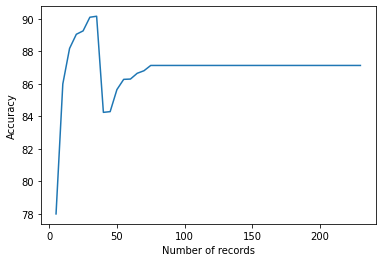

In [ ]:
i=5
accuracy = []
error = []
data = []
while i<len(df):
  accuracy.append(r2_score(y_test_sc[0:i], y_pred_test_svr[0:i])*100)
  error.append(100-(r2_score(y_test_sc[0:i], y_pred_test_svr[0:i])*100))
  data.append(i)
  i=i+5
print(accuracy)
print(error)
plt.plot(data, accuracy)
plt.ylabel("Accuracy") 
plt.xlabel("Number of records")

Text(0.5, 0, 'Number of records')

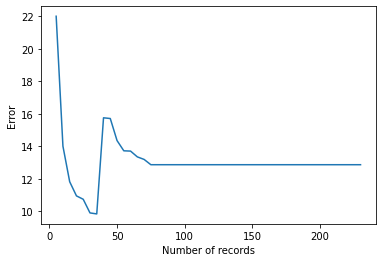

In [ ]:
plt.plot(data, error)
plt.ylabel("Error")
plt.xlabel("Number of records")

Logistic Regression

Accuracy in Training:  62.389849913326934
Accuracy in Testing:  18.95861876872581
RSME Train:  9.320470248017092
RSME Test:  13.070771607771869
Number of KFolds do you want: 5
KFold Accuracy: 62.73749403306591


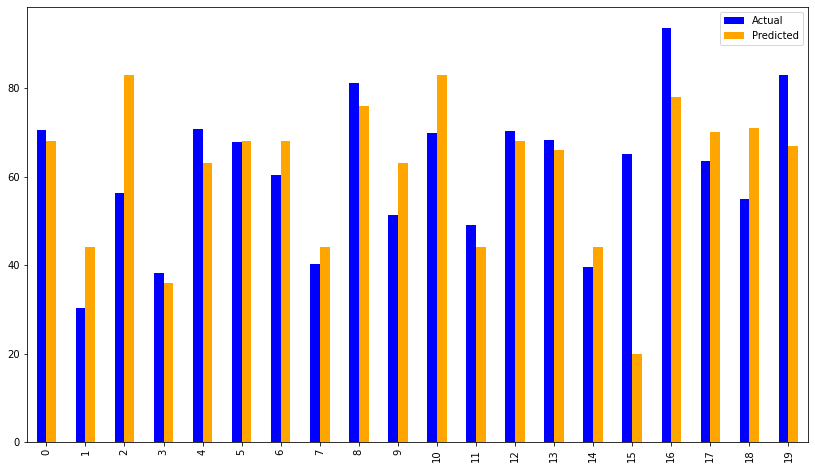

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr_model = LogisticRegression(solver='liblinear')
lgr_model.fit(x_train, y_train.astype('int'))
y_pred_train_lgr = lgr_model.predict(x_train)
y_pred_test_lgr = lgr_model.predict(x_test)
accuracy_score(y_train.astype('int'), y_pred_train_lgr, y_test.astype('int'), y_pred_test_lgr)
rsme(y_train.astype('int'), y_pred_train_lgr, y_test.astype('int'), y_pred_test_lgr)
no_kfold = int(input("Number of KFolds do you want: "))
k_fold(LogisticRegression(solver='liblinear'), x, y.astype('int'), no_kfold)
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test_lgr})
df_compare.set_index(np.arange(len(df_compare)), inplace=True) 
df_compare.head(20).plot(kind='bar',figsize=(14,8), color=['b', 'orange'])

[29.53001937225943, 51.3998305805342, 56.8716027512495, 16.251996375750423, 14.896042517462881, 22.3282654090484, 25.83745638319789, 29.719039202462728, 13.409684532283329, 11.268132831387234, 10.543213000326123, 16.361189403486655, 15.721756112290386, 19.033031152945767, 19.544041410736924, 19.544041410736924, 19.544041410736924, 19.544041410736924, 19.544041410736924, 19.544041410736924, 19.544041410736924, 19.544041410736924, 19.544041410736924, 19.544041410736924, 19.544041410736924, 19.544041410736924, 19.544041410736924, 19.544041410736924, 19.544041410736924, 19.544041410736924, 19.544041410736924, 19.544041410736924, 19.544041410736924, 19.544041410736924, 19.544041410736924, 19.544041410736924, 19.544041410736924, 19.544041410736924, 19.544041410736924, 19.544041410736924, 19.544041410736924, 19.544041410736924, 19.544041410736924, 19.544041410736924, 19.544041410736924, 19.544041410736924]
[70.46998062774057, 48.6001694194658, 43.1283972487505, 83.74800362424958, 85.103957482

Text(0.5, 0, 'Number of records')

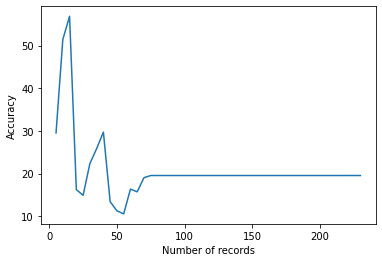

In [ ]:
i=5
accuracy = []
error = []
data = []
while i<len(df):
  accuracy.append(r2_score(y_test[0:i], y_pred_test_lgr[0:i])*100)
  error.append(100-(r2_score(y_test[0:i], y_pred_test_lgr[0:i])*100))
  data.append(i)
  i=i+5
print(accuracy)
print(error)
plt.plot(data, accuracy)
plt.ylabel("Accuracy") 
plt.xlabel("Number of records")

Text(0.5, 0, 'Number of records')

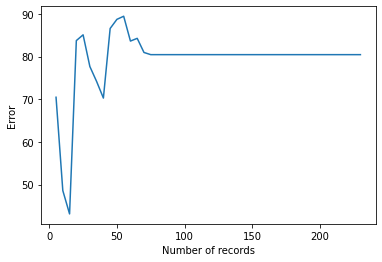

In [ ]:
plt.plot(data, error)
plt.ylabel("Error")
plt.xlabel("Number of records")

Analysis

In [ ]:
print(len(train_accuracy), len(test_accuracy), len(train_rsme), len(test_rsme), len(kfold_accuracy), len(kfolds))
df_algo = pd.DataFrame({'Algorithm': ['Multiple Linear', 'KNN', 'Random Forest', 'SVR', 'Logistic'], 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Train RMSE': train_rsme, 'Test RMSE': test_rsme, 'Kfold Accuracy': kfold_accuracy})
df_algo.set_index('Algorithm', inplace=True)
print(df_algo)

5 5 5 5 5 5
                 Train Accuracy  Test Accuracy  ...  Test RMSE  Kfold Accuracy
Algorithm                                       ...                           
Multiple Linear       57.423149      63.828627  ...   8.732100       65.360490
KNN                   69.815051      61.543125  ...   9.003746       83.047365
Random Forest         99.980205      99.830557  ...   0.597651       99.971194
SVR                   85.865232      87.137507  ...   0.347532       89.047416
Logistic              62.389850      18.958619  ...  13.070772       62.737494

[5 rows x 5 columns]


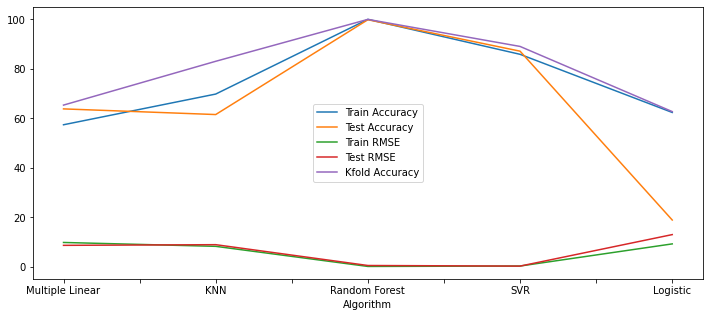

In [ ]:
df_algo[['Train Accuracy', 'Test Accuracy', 'Train RMSE', 'Test RMSE', 'Kfold Accuracy']].plot(subplots=False,figsize=(12,5))

      Actual  Linear Regression  ...       SVR  Logistic Regression
0  71.247038          53.736613  ... -0.464544                   20
1  67.016483          68.922497  ...  0.619652                   63
2  67.237525          52.549650  ... -0.405571                   63
3  76.279571          65.544950  ...  0.575174                   70
4  78.578519          54.884070  ... -0.105531                   63

[5 rows x 6 columns]


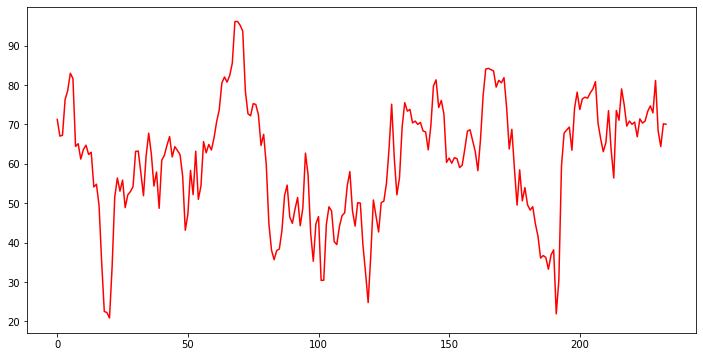

In [ ]:
df_final = pd.DataFrame({'Actual': y.flatten(), 'Linear Regression': np.append(y_pred_train_lr, y_pred_test_lr), 'KNN': np.append(y_pred_train_knn, y_pred_test_knn), 'Randon Forest': np.append(y_pred_train_rf, y_pred_test_rf), 'SVR': np.append(y_pred_train_svr, y_pred_test_svr), 'Logistic Regression': np.append(y_pred_train_lgr, y_pred_test_lgr)})
df_final.reset_index(drop=True, inplace=True)
df_final.to_excel('final.xlsx', sheet_name='Sheet1')
print(df_final.head())
plt.figure(figsize=(12, 6))
plt.plot(df_final['Actual'],color='red', label='Actual')